In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


data_train = pd.read_csv('D:\Python\Online Contest\CarInsurance_train.csv')
data_test = pd.read_csv('D:\Python\Online Contest\CarInsurance_test.csv')


Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x000000121F42DF98>>
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\xgboost\core.py", line 743, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'
Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x000000121F3C0320>>
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\xgboost\core.py", line 743, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


In [41]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [42]:

print(data_train.head())
print(data_train.describe())

   id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0              0              0              1              0              0   
1              0              0              0              1              0   
2              0              0              0              1              0   
3              0              1              0              0              0   
4              0              1              0              0              0   

   ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0              0            

In [43]:
X = data_train.iloc[:,2:]
Y = data_train.iloc[:,1]


In [44]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.33)

In [45]:
test_y = pd.DataFrame(test_y,columns= ['target'])

In [46]:
print(train_x.head())

print(train_x.describe())

        ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
508845          1              2          9              1              0   
185158          2              2          2              1              0   
146059          2              1          3              0              0   
137866          0              1          7              1              1   
40074           1              1          7              0              0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
508845              0              0              0              1   
185158              0              1              0              0   
146059              0              0              1              0   
137866              0              1              0              0   
40074               0              1              0              0   

        ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
508845              0              

In [47]:
train_x.replace(-1,np.NaN,inplace=True)
data_test.replace(-1,np.NaN,inplace=True)
test_x.replace(-1,np.NaN,inplace=True)

Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x000000121F42DA90>>
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\xgboost\core.py", line 743, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'
D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
train_med = train_x.median(axis=0)
test_med = test_x.median(axis=0)
data_test_med = data_test.median(axis=0)

train_x = train_x.fillna(train_med)
test_x = test_x.fillna(test_med)
data_test_med = data_test.fillna(data_test_med)


In [49]:
binCol = [c for c in train_x.columns if c.endswith("bin")]
catCol = [c for c in train_x.columns if c.endswith("cat")]
contCol = [c for c in train_x.columns if c not in catCol and c not in binCol]

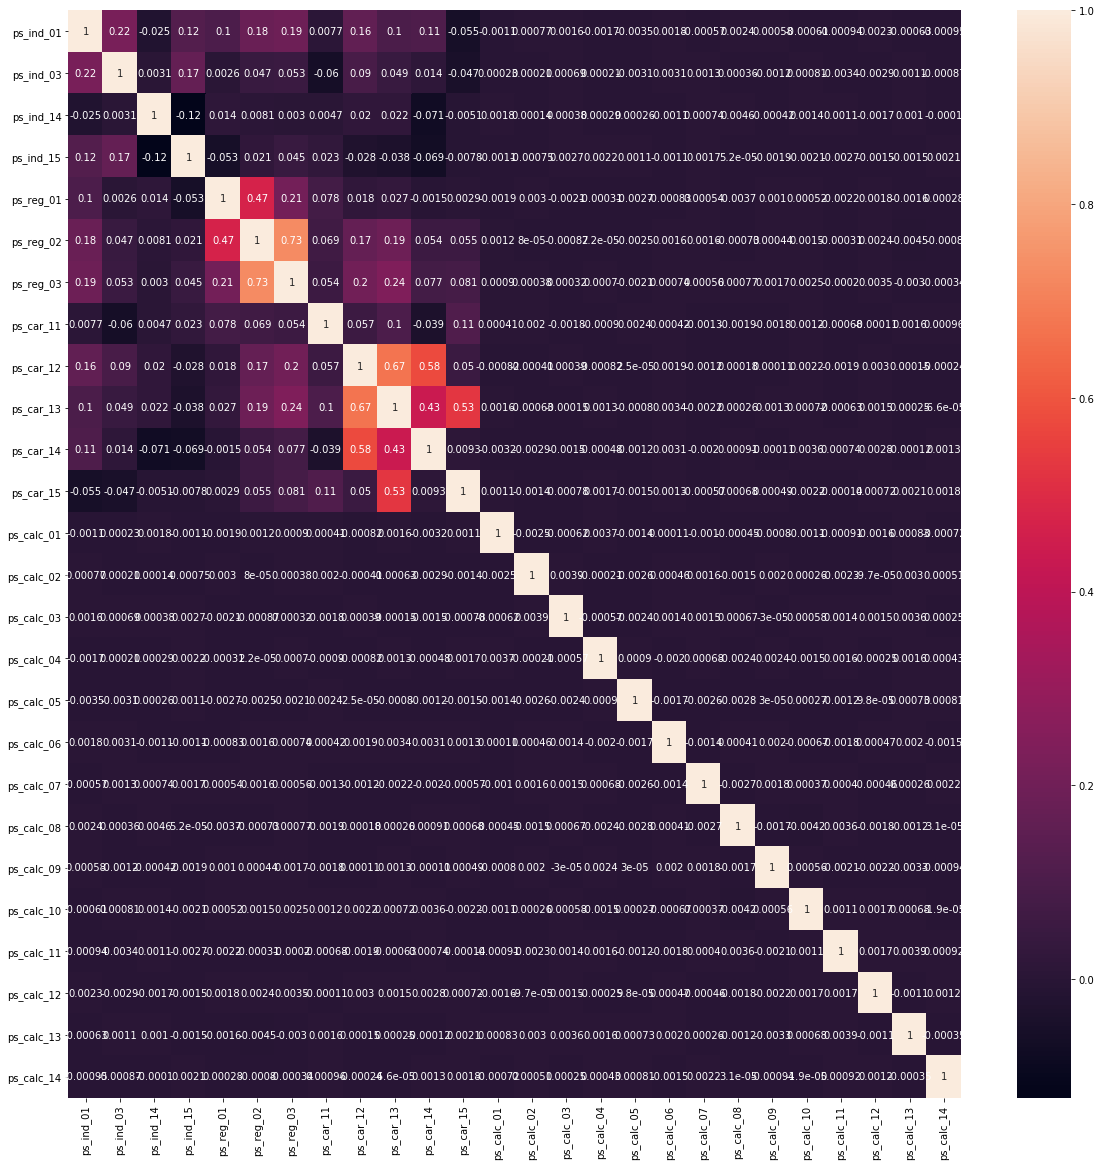

In [50]:
plt.figure(figsize=(20,20))
corr = train_x[contCol].corr()
sns.heatmap(corr,annot=True)

In [51]:
len(catCol)
len(binCol)

17

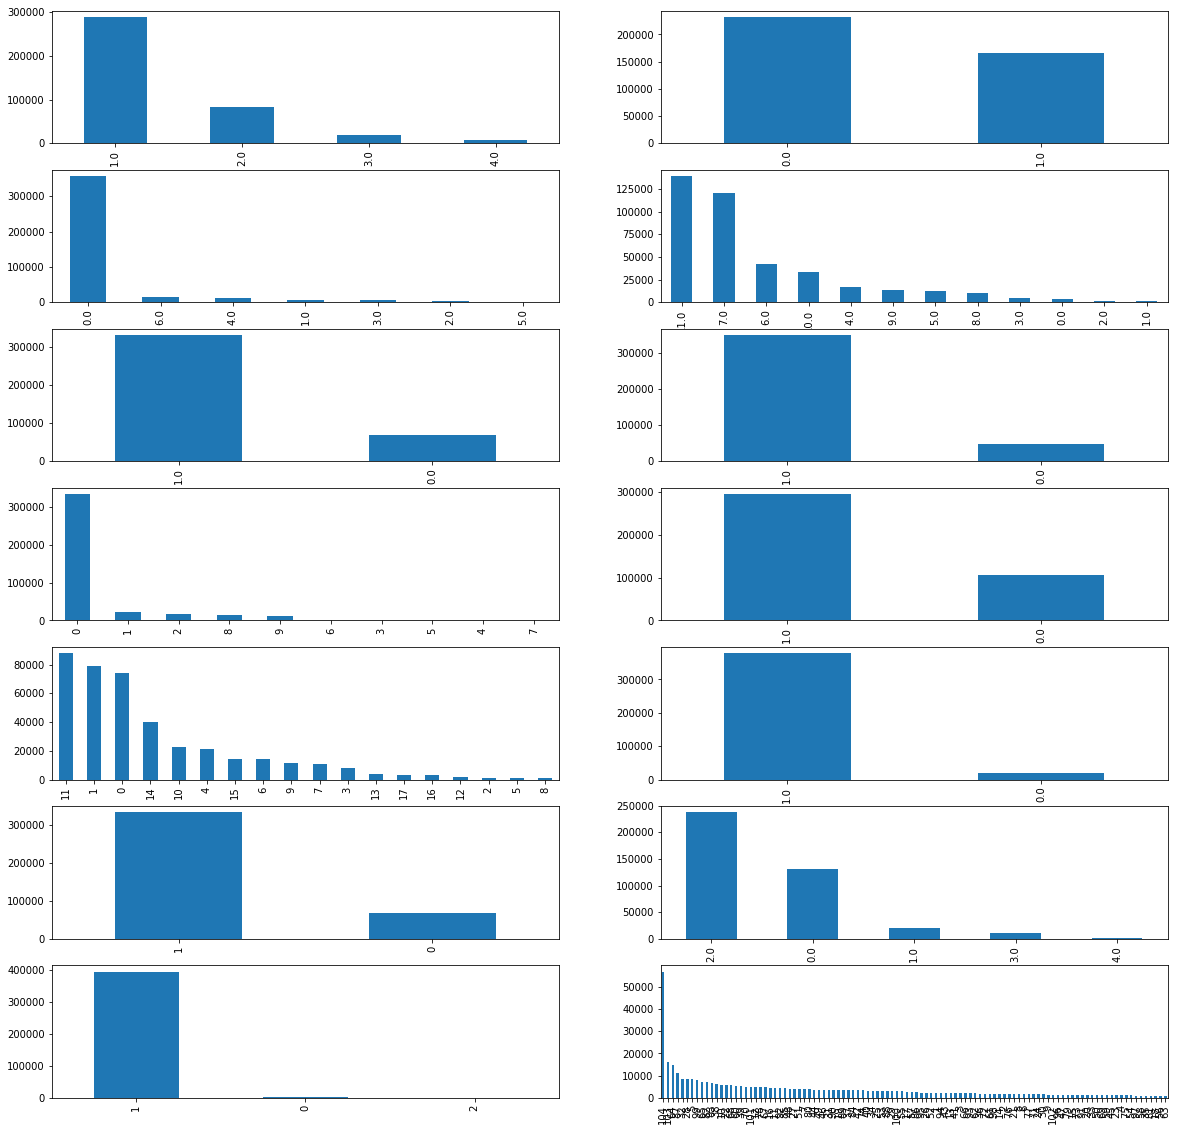

In [12]:
fg,ax = plt.subplots(7,2,figsize=(20,20))
for i in range(7):
    for j in range(2):
        train_x[catCol[i*2+j]].value_counts().plot(kind='bar',ax=ax[i,j])

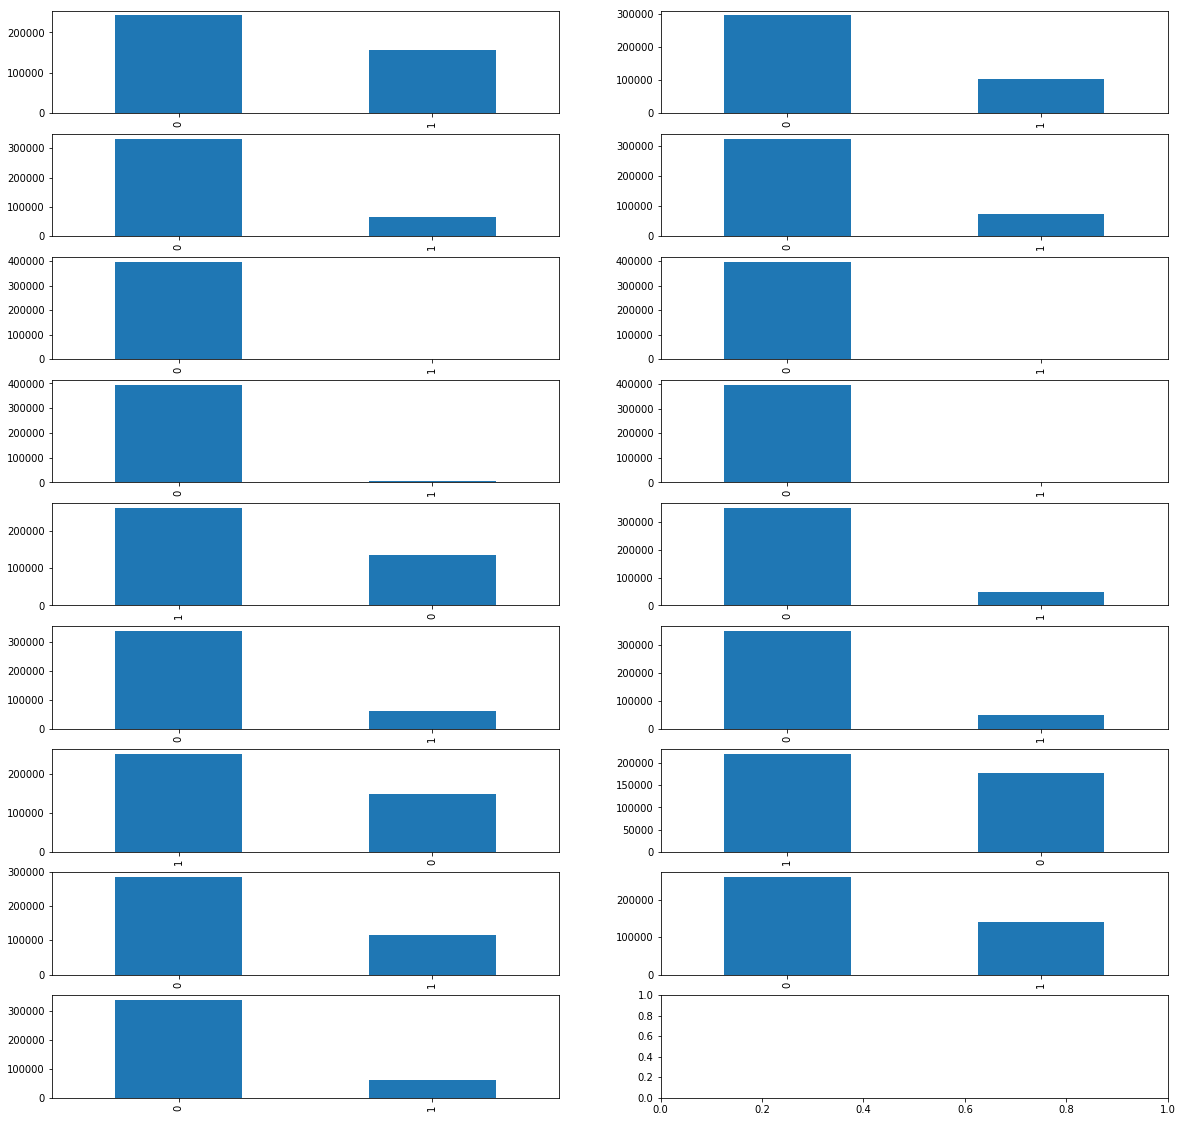

In [13]:
fg,ax = plt.subplots(9,2,figsize=(20,20))
for i in range(9):
    for j in range(2):
        if(i==8 and j==1):
            break
        train_x[binCol[i*2+j]].value_counts().plot(kind='bar',ax=ax[i,j])
        

In [52]:
train_x[binCol[4]].value_counts()

0    398642
1       150
Name: ps_ind_10_bin, dtype: int64

In [53]:
train_x.drop([binCol[4],binCol[5],binCol[7]],axis=1,inplace=True)

In [54]:
len(contCol)

26

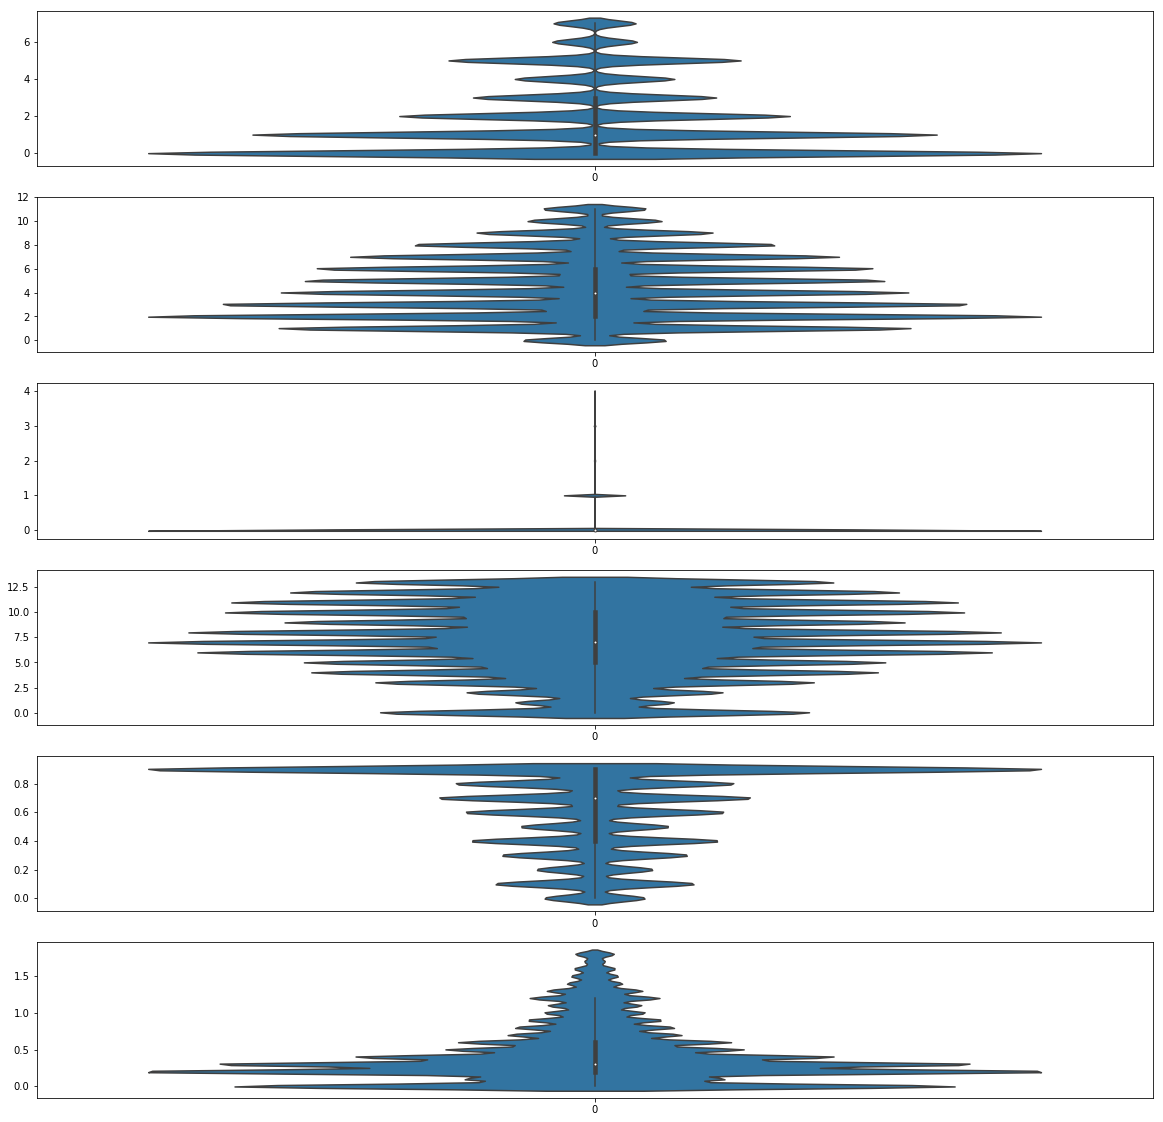

In [50]:
fg, ax = plt.subplots(6,1,figsize=(20,20))
for i in range(6):
    sns.violinplot(data=train_x[contCol[i]],ax=ax[i])

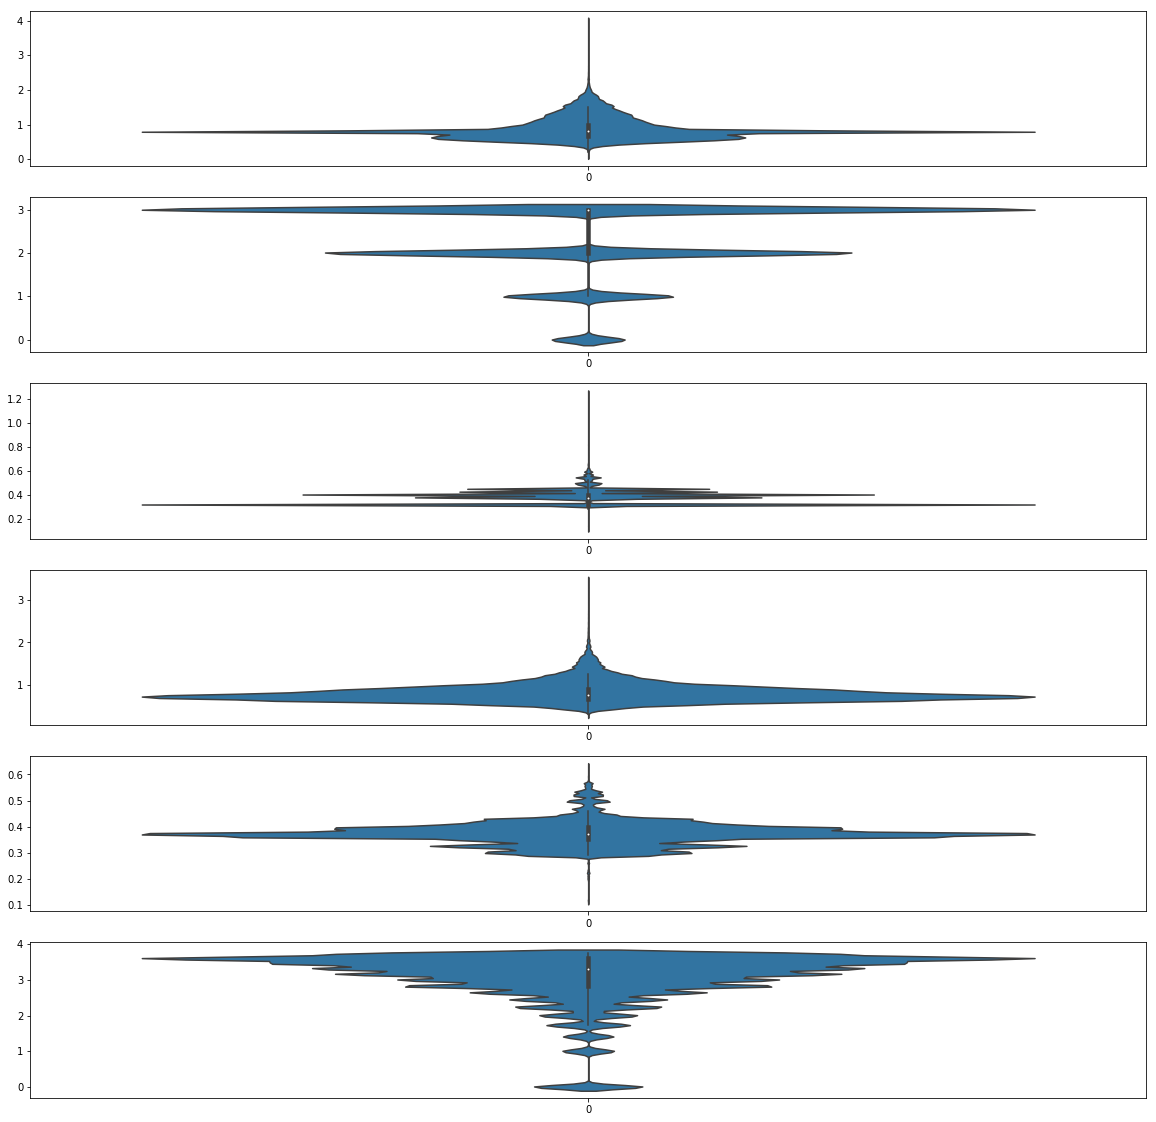

In [54]:
fg , ax =plt.subplots(6,1,figsize=(20,20))
for i in range(6,12):
    sns.violinplot(data=train_x[contCol[i]],ax=ax[i-6])

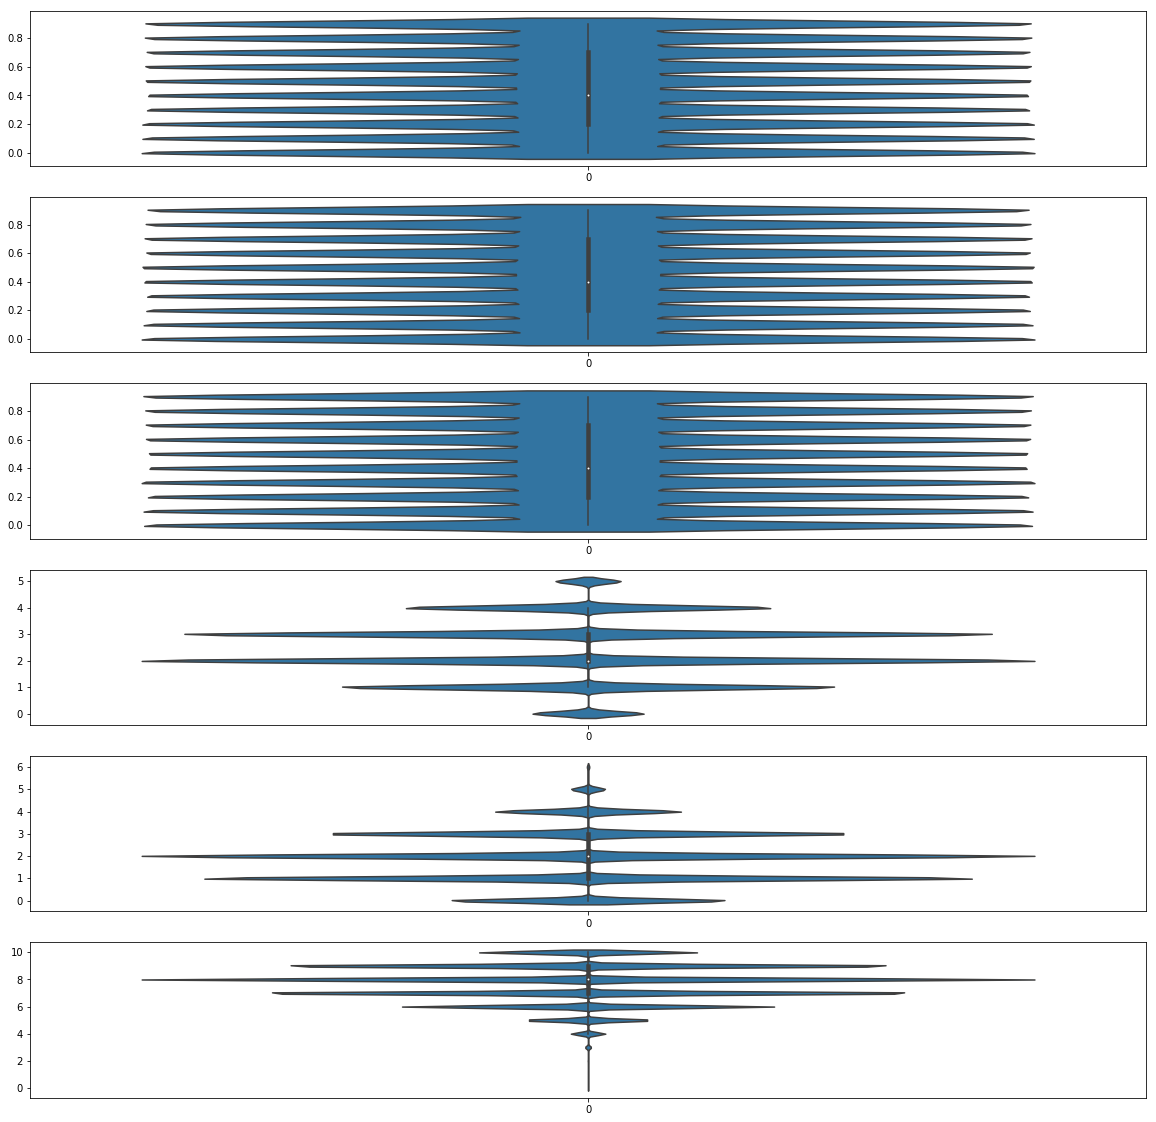

In [56]:
fg , ax =plt.subplots(6,1,figsize=(20,20))
for i in range(12,18):
    sns.violinplot(data=train_x[contCol[i]],ax=ax[i-12])

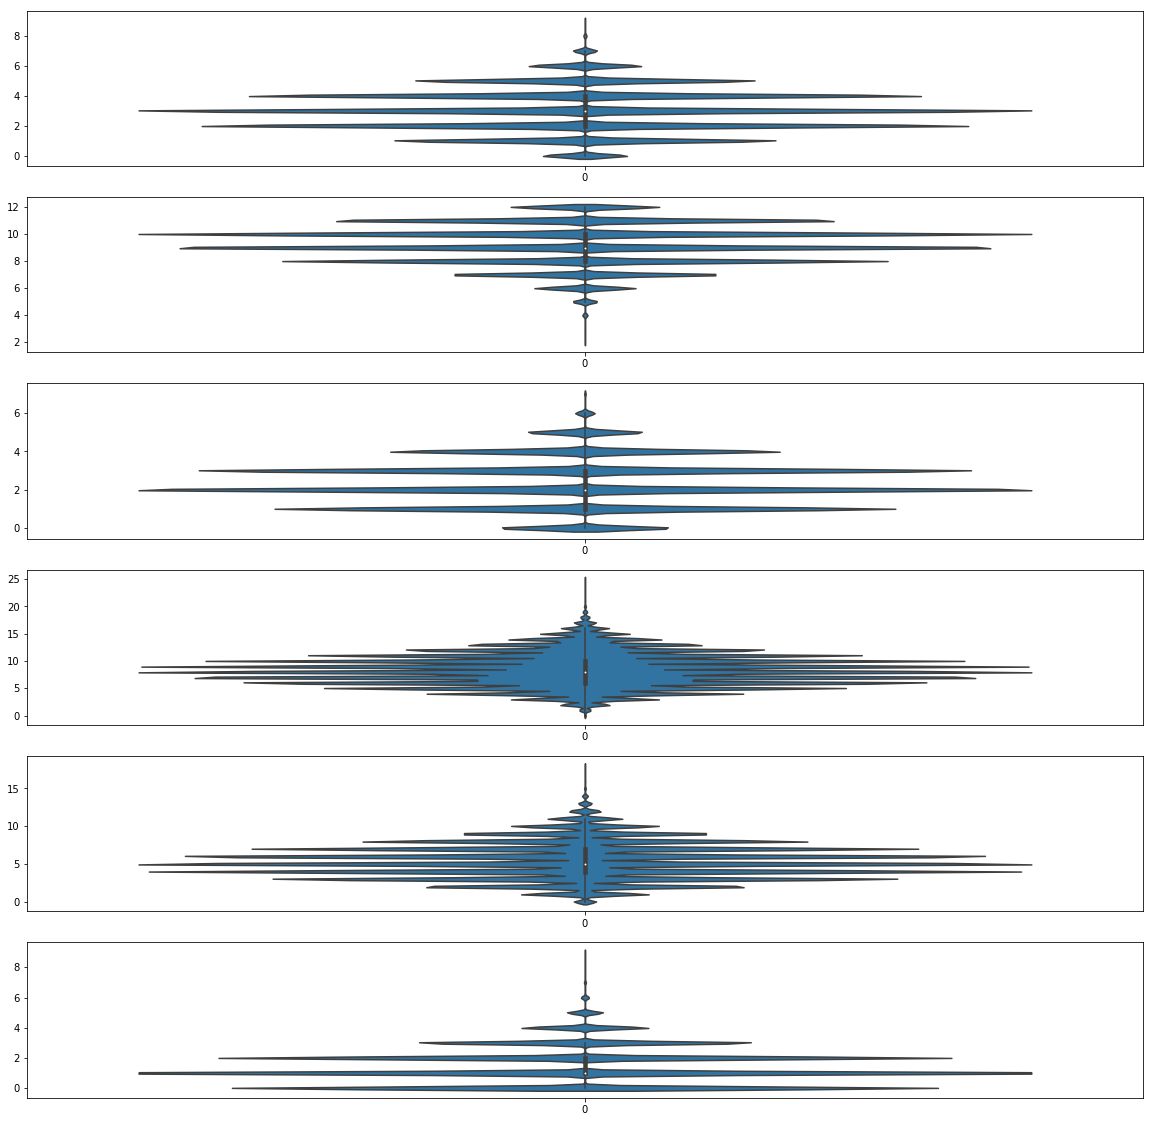

In [57]:
fg , ax =plt.subplots(6,1,figsize=(20,20))
for i in range(18,24):
    sns.violinplot(data=train_x[contCol[i]],ax=ax[i-18])

In [55]:
#Exploring continuous variable 2
train_x[contCol[2]].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [56]:
#SVM
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.linear_model import SGDClassifier
clf1 = SGDClassifier(verbose=1)
clf1.fit(train_x,train_y)
test_x.drop([binCol[4],binCol[5],binCol[7]],axis=1,inplace=True)
print(clf1.score(train_x,train_y))
print(clf1.score(test_x,test_y))

D:\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 15.85, NNZs: 54, Bias: -25.771640, T: 398792, Avg. loss: 29.067248
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 9.59, NNZs: 54, Bias: -25.217195, T: 797584, Avg. loss: 3.631044
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 6.82, NNZs: 54, Bias: -24.583782, T: 1196376, Avg. loss: 2.170323
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 5.86, NNZs: 54, Bias: -23.821362, T: 1595168, Avg. loss: 1.559281
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 5.43, NNZs: 54, Bias: -23.150373, T: 1993960, Avg. loss: 1.228761
Total training time: 1.19 seconds.
0.963517322313
0.963623867223


In [57]:
#Test Score = 94%


In [26]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier
params={'n_estimators':[10,50,100,200],'max_depth':[1,5,20,54]}
clf2 = GridSearchCV(RandomForestClassifier(verbose=1,n_jobs=-1),param_grid=params)

In [27]:
clf2.fit(train_x,train_y)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  50 out of  50 

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200], 'max_depth': [1, 5, 20, 54]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
print(clf2.score(train_x,train_y))
print(clf2.score(test_x,test_y))
#Test Score = 96.39%

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished


0.963379405806
0.963903879442
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


In [30]:
print(clf2.best_params_)

{'max_depth': 1, 'n_estimators': 10}


In [59]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf3 = AdaBoostClassifier(n_estimators=1)
clf3.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None)

In [60]:
print(clf3.score(train_x,train_y))
print(clf3.score(test_x,test_y))

0.963517322313
0.963623867223


In [62]:
#XGBoost
import xgboost as xgb 



In [63]:
dX_train = xgb.DMatrix(train_x, label = train_y)
dX_test = xgb.DMatrix(test_x, label = test_y)

In [64]:
param = {}
param['objective'] = 'binary:logistic'
param['eta'] = 0.1
param['silent'] = True
param['max_depth'] = 20
param['subsample'] = 0.8
param['colsample_bytree'] = 0.8
param['eval_metric'] = 'auc'
evallist  = [(dX_test,'eval'), (dX_train,'train')]

In [65]:
model=xgb.train(param, dX_train, 100, evallist, early_stopping_rounds=20, maximize=True, verbose_eval=9)

[0]	eval-auc:0.596548	train-auc:0.609797
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 20 rounds.
[9]	eval-auc:0.611383	train-auc:0.7605
[18]	eval-auc:0.601186	train-auc:0.931388
[27]	eval-auc:0.597519	train-auc:0.986803
[36]	eval-auc:0.597516	train-auc:0.998362
[45]	eval-auc:0.596886	train-auc:0.999878
[54]	eval-auc:0.597509	train-auc:0.999991
[63]	eval-auc:0.598469	train-auc:0.999999
[72]	eval-auc:0.597391	train-auc:1
[81]	eval-auc:0.598276	train-auc:1
Stopping. Best iteration:
[64]	eval-auc:0.598095	train-auc:1



In [66]:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

In [104]:
y_prob = model.predict(dX_test)
eval_gini(test_y,y_prob)

array([ 0.19443861])

In [105]:
data_test.shape

(892816, 54)

In [106]:
data_test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_12_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1.0,8,1.0,0.0,0,1,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7.0,1.0,NaN,0,NaN,1,1.0,1,2.0,1,65,1.0,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,4,2.0,5,1.0,0.0,0,0,0,1,0,0,5,1,0,0,0.9,0.5,0.771362,4.0,1.0,NaN,0,0.0,11,1.0,1,0.0,1,103,1.0,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,5,1.0,3,0.0,0.0,0,0,0,1,0,0,10,0,0,0,0.4,0.0,0.916174,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,29,3.0,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,0,1.0,6,0.0,0.0,1,0,0,0,0,0,4,1,0,0,0.1,0.2,NaN,7.0,1.0,NaN,0,NaN,1,1.0,1,2.0,1,40,2.0,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,5,1.0,7,0.0,0.0,0,0,0,1,0,0,4,1,0,0,0.9,0.4,0.817771,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,101,3.0,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


In [133]:
val = pd.DataFrame()
val['id'] = data_test['id']
val['target'] = model.predict(xgb.DMatrix(data_test))
val.to_csv('xgb_valid.csv', float_format='%.6f', index=False)

KeyError: 'id'

D:\Python\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


array([[ nan],
       [ nan]])

In [80]:
data_test.drop(['id',binCol[4],binCol[5],binCol[7]],axis=1,inplace=True)